In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/GitHub/NLP-project-/NLP/Dataset/df_final_cv.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df.head()

,Unnamed: 0,status,description,username,fbid,connected_fb_page,profile_pic_url,full_name,is_private,category_name,...,input_stop_id,warning,error,tags,confidence_score,accent_color,is_bw,dominant_colors,bg_color,fore_color
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"['text', 'font', 'graphics', 'screenshot', 'gr...","[0.9980798959732056, 0.9481294751167297, 0.881...","(0.788235294117647, 0.00784313725490196, 0.007...",0,"[(1.0, 0.7529411764705882, 0.796078431372549)]","(1.0, 0.7529411764705882, 0.796078431372549)","(1.0, 0.7529411764705882, 0.796078431372549)"
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"['dessert', 'baked goods', 'baking', 'snack', ...","[0.9897554516792297, 0.987897515296936, 0.9828...","(0.6901960784313725, 0.14901960784313725, 0.10...",0,"[(0.6470588235294118, 0.16470588235294117, 0.1...","(0.6470588235294118, 0.16470588235294117, 0.16...","(0.0, 0.0, 0.0)"
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"['food', 'fruit', 'baked goods', 'breakfast', ...","[0.9808361530303955, 0.9546540379524231, 0.947...","(0.6588235294117647, 0.4392156862745098, 0.141...",0,"[(0.6470588235294118, 0.16470588235294117, 0.1...","(0.6470588235294118, 0.16470588235294117, 0.16...","(0.6470588235294118, 0.16470588235294117, 0.16..."
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"['food', 'bread', 'fast food', 'bun', 'america...","[0.9958561658859253, 0.981575608253479, 0.9799...","(0.24313725490196078, 0.12549019607843137, 0.0...",0,"[(0.6470588235294118, 0.16470588235294117, 0.1...","(0.6470588235294118, 0.16470588235294117, 0.16...","(0.6470588235294118, 0.16470588235294117, 0.16..."
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"['text', 'font', 'design', 'yellow', 'graphics...","[0.9993002414703369, 0.9640201926231384, 0.951...","(0.792156862745098, 0.7372549019607844, 0.0039...",0,"[(1.0, 1.0, 0.0)]","(1.0, 1.0, 0.0)","(1.0, 1.0, 0.0)"


In [6]:
from functools import reduce

In [7]:
%run /content/drive/MyDrive/GitHub/NLP-project-/NLP/Dataset/preprocessing.ipynb

     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 42 kB 1.8 MB/s 
     |████████████████████████████████| 1.3 MB 18.0 MB/s 
     |████████████████████████████████| 65 kB 4.8 MB/s 
     |████████████████████████████████| 53 kB 2.9 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=59a335ef029d81066a86885ad193635b2c071d0ae18b73aeadd512fafcf31ab2
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
import time
# Config

REPLACE_mentions = re.compile('@[A-Za-z0-9_]+')
REPLACE_hashtags=re.compile('#[A-Za-z0-9_]+')
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
GOOD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')

try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))


def lower(text: str) -> str:
    """
    Transforms given text to lower case.
    Example:
    Input: 'I really like New York city'
    Output: 'i really like new your city'
    """

    return text.lower()

def replace_special_characters(text: str) -> str:
    """
    Replaces special characters, such as paranthesis,
    with spacing character
    """

    return REPLACE_BY_SPACE_RE.sub(' ', text)

def replace_br(text: str) -> str:
    """
    Replaces br characters
    """

    return text.replace('br', '')

def filter_out_uncommon_symbols(text: str) -> str:
    """
    Removes any special character that is not in the
    good symbols list (check regular expression)
    """

    return GOOD_SYMBOLS_RE.sub('', text)

def remove_stopwords(text: str) -> str:
    return ' '.join([x for x in text.split() if x and x not in STOPWORDS])


def strip_text(text: str) -> str:
    """
    Removes any left or right spacing (including carriage return) from text.
    Example:
    Input: '  This assignment is cool\n'
    Output: 'This assignment is cool'
    """

    return text.strip()

def remove_brackets_from_list(text:str)->str:
    """
    Remove the [] brackets from the each of the list
    """
    return text

global var
global stime

var = 0


def clean_mention(text:str)-> str:
    return REPLACE_mentions.sub(' ', str(text))

def clean_hashtags(text:str)-> str:
    return REPLACE_hashtags.sub(' ', str(text))

In [9]:
from typing import List, Callable, Dict
from googletrans import Translator
PREPROCESSING_PIPELINE = [
                          clean_mention,
                          clean_hashtags,
                          lower,
                          replace_special_characters,
                          replace_br,
                          strip_text,
                          remove_stopwords,
                          filter_out_uncommon_symbols,
                          
                          ]

PREPROCESSING_PIPELINE1 = [remove_brackets_from_list]


# Anchor method

def text_prepare1(text: str, filter_methods: List[Callable[[str], str]] = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE1
    return reduce(lambda txt, f: f(txt), filter_methods, text)

def text_prepare(text: str, filter_methods: List[Callable[[str], str]] = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """
    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE
    return reduce(lambda txt, f: f(txt), filter_methods, text)

# Pre-processing

print('Pre-processing text...')
print('[Debug] Before:\n{}'.format(df.caption[:10]))

#L=['hashtags','emoji_text','mentions']
A=['caption']

# Replace each sentence with its pre-processed version
df['caption'] = df['caption'].apply(lambda txt: text_prepare(txt))

#for i in L:
 # extracted[i]=extracted[i].apply(lambda txt: text_prepare1(str(txt)[1:-1]))

print('[Debug] After:\n{}'.format(df.caption[:10]))
print()

print("Pre-processing completed!")

Pre-processing text...
[Debug] Before:
0    It’s our last Pizza Sunday at the arch today. ...
1                         New cakes on our counters 😋😋
2    🔺Opening Times for Half Term🔺: Hi everyone we ...
3    New addition to our selection of sandwiches, o...
4    We are currently closed as we move into our ne...
5    Weekend treats…\nIncluding the return of our “...
6    New vegan “Chocolate & Toasted Almond Cake wit...
7    Posted @withregram • @londoncoffeeshops Pastri...
8    We are looking for experienced part-time baris...
9    Posted @withregram • @marthadelacey Thrilled f...
Name: caption, dtype: object
[Debug] After:
0    its last pizza sunday arch today pizzas availa...
1                                  new cakes counters 
2    opening times half term hi everyone wanted let...
3    new addition selection sandwiches roasted aube...
4    currently closed move new exciting space aroun...
5    weekend treats including return coconut custar...
6    new vegan chocolate  toasted alm

#df_industry

In [10]:
df_industry=pd.read_csv('/content/drive/MyDrive/GitHub/NLP-project-/NLP/Dataset/df_industry.csv', encoding='latin-1')

In [11]:
df_industry.head()

,ACCOUNT,INDUSTRY,SUB-CATEGORY,REGION
0,deepaestheticss,cosmetics,beauty clinic,UK
1,jossyaesthetics,cosmetics,beauty clinic,UK
2,kanpailondon,hospitality,brewery,UK
3,drjb.aesthetics,cosmetics,beauty clinic,UK
4,nataliefaccini.aesthetics,cosmetics,beauty clinic,UK


In [12]:
df_industry=df_industry.rename(columns={'ACCOUNT':'account'})

In [13]:
mergedStuff=pd.merge(df, df_industry, on=['account'], how='inner')

In [14]:
df_cosmetics=mergedStuff[mergedStuff['INDUSTRY']=='cosmetics']
#df_cosmetics.to_csv('df_cosmetics.csv')
df_hospitality=mergedStuff[mergedStuff['INDUSTRY']=='hospitality']
#df_hospitality.to_csv('df_hospitality.csv')

df_fit_sport=mergedStuff[mergedStuff['INDUSTRY']=='fitness']
df_real_estate=mergedStuff[mergedStuff['INDUSTRY']=='real estate']
df_retail=mergedStuff[mergedStuff['INDUSTRY']=='retail']
df_sport_recreation=mergedStuff[mergedStuff['INDUSTRY']=='sport & recreation']
df_fashion=mergedStuff[mergedStuff['INDUSTRY']=='fashion']
df_childcare=mergedStuff[mergedStuff['INDUSTRY']=='childcare']

#df_cosmetics

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X=vectorizer.fit_transform(df_cosmetics['caption'])

In [16]:
df_cosmetics['SUB-CATEGORY'].unique()

array(['beauty clinic', 'beauty products', 'dental practice'],
      dtype=object)

In [17]:
#from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# initialize kmeans with 3 centroids
kmeans = KMeans(n_clusters=3, random_state=42)
# fit the model
kmeans.fit(X)
# store cluster labels in a variable
clusters = kmeans.labels_

In [18]:
from sklearn.decomposition import PCA

# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
# pass our X to the pca and store the reduced vectors into pca_vecs
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [19]:
# assign clusters and pca vectors to our dataframe 
df_cosmetics['cluster'] = clusters
df_cosmetics['x0'] = x0
df_cosmetics['x1'] = x1

#cluster_map_cosm = {0:'beauty clinic',1: 'beauty products',2: 'dental practice'}
#df_cosmetics['cluster'] = df_cosmetics['cluster'].map(cluster_map_cosm)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [20]:
import numpy as np
def get_top_keywords(n_terms, df):
    """This function returns the keywords for each centroid of the KMeans"""
    df = pd.DataFrame(X.todense()).groupby(clusters).mean() # groups the TF-IDF vector by cluster
    terms = vectorizer.get_feature_names_out() # access tf-idf terms
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([terms[t] for t in np.argsort(r)[-n_terms:]])) # for each row of the dataframe, find the n terms that have the highest tf idf score
            
get_top_keywords(10, df_cosmetics)


Cluster 0
skin,170,dm,12,filler,book,lip,lips,11,treatment

Cluster 1
ratio,golden,contouring,liquid,da,reshaping,beautification,nonsurgical,package,rhinoplasty

Cluster 2
market,nataliefaccinicouk,farringdon,exmouth,7503793750,0044,ec1r4qp,12,microblading,used


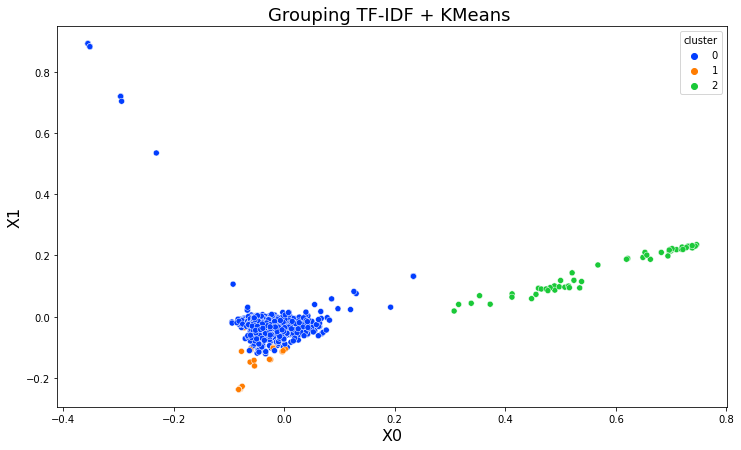

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
# set image size
plt.figure(figsize=(12, 7))
# set title
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
#  create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_cosmetics, x='x0', y='x1', hue='cluster', palette="bright")
plt.savefig('cosmetics_clustering.png')

plt.show()

#df_hospitality



In [22]:
df_hospitality['SUB-CATEGORY'].unique()

array(['bakery', 'restaurant', 'hotel', 'bar', 'café', 'cocktail bar',
       'streetfood market',
       'restaurants / lifestyle shop / deli / plant nursery',
       'empanadas store / delivery', 'wine bar', 'wine bar & shop',
       'breakfast & brunch restaurant', 'pub', 'poke shop',
       'fast food chain', 'beer garden', 'serviced apartments',
       'coffee / food shop', 'pastry shop', 'ice cream shop', 'brewery',
       'bar & kitchen', 'chocolate shop', 'pub & restaurant',
       'bar & grill', 'doughnut shop', 'dessert shop', 'food delivery'],
      dtype=object)

In [23]:
df_retail=df_retail.append(df_hospitality.loc[(df_hospitality['SUB-CATEGORY']=='streetfood market') |
                   (df_hospitality['SUB-CATEGORY']=='coffee / food shop')|
                   (df_hospitality['SUB-CATEGORY']=='empanadas store / delivery')|
                   (df_hospitality['SUB-CATEGORY']=='wine bar & shop')|
                   (df_hospitality['SUB-CATEGORY']=='ice cream shop')|
                   (df_hospitality['SUB-CATEGORY']=='bakery')|
                   (df_hospitality['SUB-CATEGORY']=='chocolate shop')|
                   (df_hospitality['SUB-CATEGORY']=='poke shop')|
                   (df_hospitality['SUB-CATEGORY']=='pastry shop')|
                   (df_hospitality['SUB-CATEGORY']=='doughnut shop')|
                   (df_hospitality['SUB-CATEGORY']=='dessert shop')|
                   (df_hospitality['SUB-CATEGORY']=='empanadas shop / delivery')|
                   (df_hospitality['SUB-CATEGORY']=='food delivery')])


In [24]:
df_hospitality=df_hospitality.drop(df_hospitality[(df_hospitality['SUB-CATEGORY']=='streetfood market') |
                   (df_hospitality['SUB-CATEGORY']=='coffee / food shop')|
                   (df_hospitality['SUB-CATEGORY']=='empanadas store / delivery')|
                   (df_hospitality['SUB-CATEGORY']=='wine bar & shop')|
                   (df_hospitality['SUB-CATEGORY']=='ice cream shop')|
                   (df_hospitality['SUB-CATEGORY']=='bakery')|
                   (df_hospitality['SUB-CATEGORY']=='chocolate shop')|
                   (df_hospitality['SUB-CATEGORY']=='poke shop')|
                   (df_hospitality['SUB-CATEGORY']=='pastry shop')|
                   (df_hospitality['SUB-CATEGORY']=='doughnut shop')|
                   (df_hospitality['SUB-CATEGORY']=='dessert shop')|
                   (df_hospitality['SUB-CATEGORY']=='empanadas shop / delivery')|
                   (df_hospitality['SUB-CATEGORY']=='food delivery')].index)

In [25]:
df_hospitality['SUB-CATEGORY']=df_hospitality['SUB-CATEGORY'].replace(['bar', 'café', 'bar & kitchen', 'bar & grill', 'cocktail bar', 'wine bar', 'pub', 'brewery'], 'bar')
df_hospitality['SUB-CATEGORY']=df_hospitality['SUB-CATEGORY'].replace(['restaurant', 'beer garden','restaurants / lifestyle shop / deli / plant nursery', 'breakfast & brunch restaurant', 'fast food chain','pub & restaurant'], 'restaurant')
df_hospitality['SUB-CATEGORY']=df_hospitality['SUB-CATEGORY'].replace(['hotel', 'serviced apartments'], 'hotel')

In [26]:
df_hospitality['SUB-CATEGORY'].unique()

array(['restaurant', 'hotel', 'bar'], dtype=object)

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df_hospitality['caption'])

In [28]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

In [29]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [30]:
df_hospitality['cluster'] = clusters
df_hospitality['x0'] = x0
df_hospitality['x1'] = x1

cluster_map_hosp = {0: 'bar', 1:'restaurant', 2:'hotel'}
df_hospitality['cluster'] = df_hospitality['cluster'].map(cluster_map_hosp);

In [31]:
get_top_keywords(10, df_hospitality)


Cluster 0
coffee,delicious,love,available,favourite,menu,perfect,new,one,weekend

Cluster 1
menu,us,table,reservation,make,via,click,book,bio,link

Cluster 2
year,team,today,see,open,back,were,happy,day,us


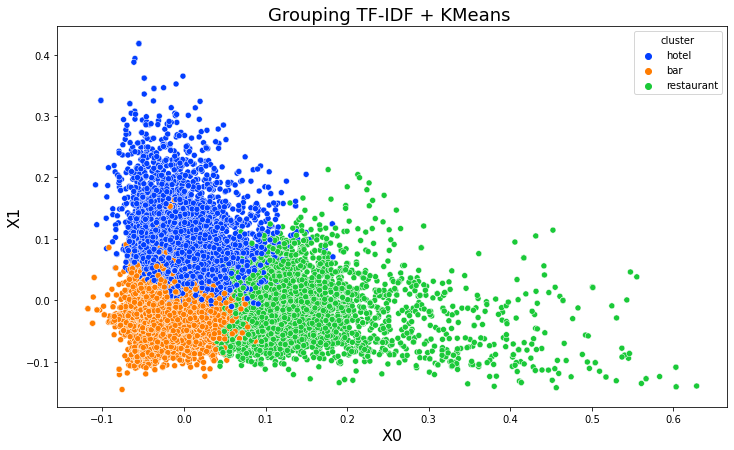

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df_hospitality, x='x0', y='x1', hue='cluster', palette="bright")
plt.savefig('hospitality_clustering.png')

plt.show()

#df_fit_sport


In [33]:
df_fit_sport['SUB-CATEGORY'].unique()

array(['boutique wellness studio', 'gym', 'bootcamp classes'],
      dtype=object)

In [34]:
df_fit_sport['SUB-CATEGORY']=df_fit_sport['SUB-CATEGORY'].replace(['bootcamp classes','boutique wellness studio'], 'gym')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
df_fit_sport=df_fit_sport.append(df_sport_recreation)

In [36]:
df_fit_sport['SUB-CATEGORY'].unique()

array(['gym', 'swimming school', 'paddleboard rental', 'public pool'],
      dtype=object)

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df_fit_sport['caption'])

In [38]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

In [39]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [40]:
df_fit_sport['cluster'] = clusters
df_fit_sport['x0'] = x0
df_fit_sport['x1'] = x1

cluster_map_fit = {0:'gym', 1:'swimming school', 2:'paddleboard rental', 3:'public pool'} 
df_fit_sport['cluster'] = df_fit_sport['cluster'].map(cluster_map_fit);

In [41]:
get_top_keywords(10, df_fit_sport)


Cluster 0
class,everyone,like,new,one,us,its,time,get,day

Cluster 1
email,dm,gym,trial,classes,couk,us,free,majestic,fitness

Cluster 2
tyb,link,bio,twickenham,studio,new,week,mat,see,richmond

Cluster 3
streamed,join,0845,mindful,1015,yang,flow,0915,yoga,yin


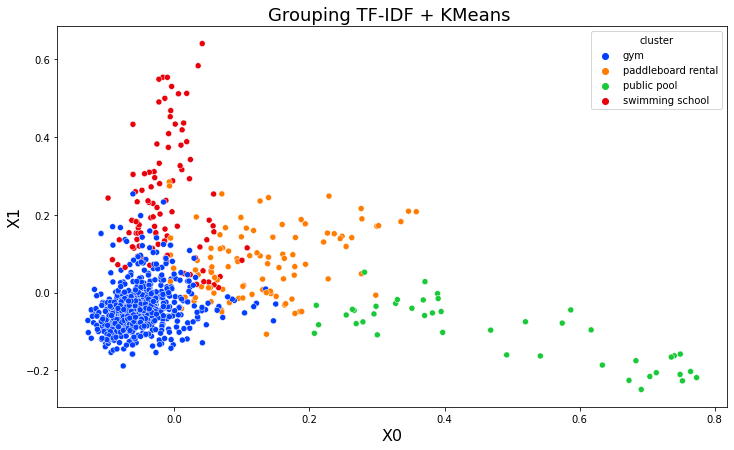

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df_fit_sport, x='x0', y='x1', hue='cluster', palette="bright")
plt.savefig('fitness_clustering.png')

plt.show()

#df_retail


In [43]:
df_retail['SUB-CATEGORY'].unique()

array(['dessert shop', 'florist', 'deli shop',
       'wine, beer & spirits shop', 'fishmongers / butchers', 'bakery',
       'streetfood market', 'empanadas store / delivery',
       'wine bar & shop', 'poke shop', 'coffee / food shop',
       'pastry shop', 'ice cream shop', 'chocolate shop', 'doughnut shop',
       'food delivery'], dtype=object)

In [44]:
df_retail['SUB-CATEGORY']=df_retail['SUB-CATEGORY'].replace(['dessert shop', 'deli shop', 'bakery', 'pastry shop', 'ice cream shop', 'chocolate shop', 'doughnut shop'], 'dessert shop')
df_retail['SUB-CATEGORY']=df_retail['SUB-CATEGORY'].replace(['wine, beer & spirits shop', 'wine bar & shop'], 'spirits shop')
df_retail['SUB-CATEGORY']=df_retail['SUB-CATEGORY'].replace(['streetfood market', 'coffee / food shop', 'poke shop'], 'food shop')
df_retail['SUB-CATEGORY']=df_retail['SUB-CATEGORY'].replace(['empanadas store / delivery', 'food delivery'], 'delivery')



In [45]:
df_retail['SUB-CATEGORY'].unique()

array(['dessert shop', 'florist', 'spirits shop',
       'fishmongers / butchers', 'food shop', 'delivery'], dtype=object)

In [46]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df_retail['caption'])

In [47]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [49]:
df_retail['cluster'] = clusters
df_retail['x0'] = x0
df_retail['x1'] = x1

cluster_map_retail = {0:'dessert shop', 1:'florist', 2:'spirits shop',
       3:'fishmongers / butchers', 4:'food shop', 5:'delivery'} 
df_retail['cluster'] = df_retail['cluster'].map(cluster_map_retail);

In [50]:
get_top_keywords(10, df_retail)


Cluster 0
sourdough,day,ready,week,nan,one,new,available,weekend,today

Cluster 1
cookie,vanilla,hot,topped,dark,raspberry,caramel,cream,white,chocolate

Cluster 2
fresh,ready,today,pastries,baked,sunday,open,coffee,good,morning

Cluster 3
pastries,sunday,come,saturday,back,see,were,tomorrow,today,open

Cluster 4
were,time,team,love,order,bio,link,christmas,day,us

Cluster 5
birthday,new,day,love,order,slice,cakes,chocolate,wedding,cake


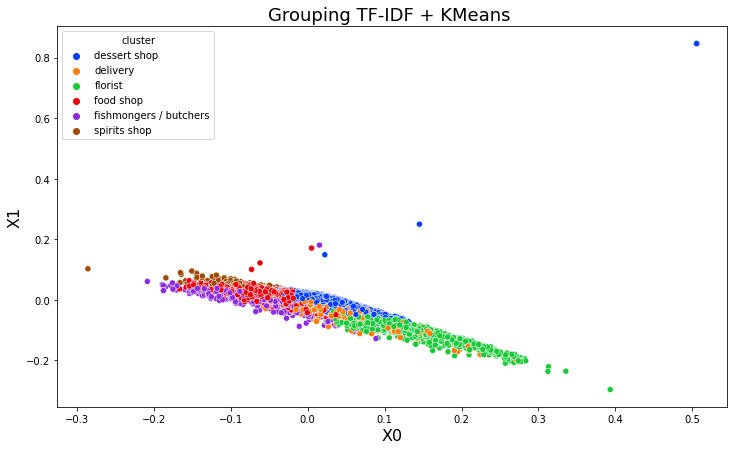

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})

plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df_retail, x='x0', y='x1', hue='cluster', palette="bright")
plt.savefig('retail_clustering.png')

plt.show()

#df_childcare


In [52]:
df_childcare['SUB-CATEGORY'].unique()

array(['preparatory school', 'nursery'], dtype=object)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df_childcare['caption'])

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
clusters = kmeans.labels_

In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_vecs = pca.fit_transform(X.toarray())
x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [56]:
df_childcare['cluster'] = clusters
df_childcare['x0'] = x0
df_childcare['x1'] = x1

cluster_map_childcare = {0: "nursery", 1: "preparatory school"} 
df_childcare['cluster'] = df_childcare['cluster'].map(cluster_map_childcare);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [57]:
get_top_keywords(20, df_childcare)


Cluster 0
back,yesterday,congratulations,fantastic,thank,delighted,also,look,department,great,recently,week,pupils,time,term,done,well,day,boys,year

Cluster 1
place,today,house,kings,open,happy,behind,team,mall,find,new,week,morning,class,meet,bio,link,school,children,nursery


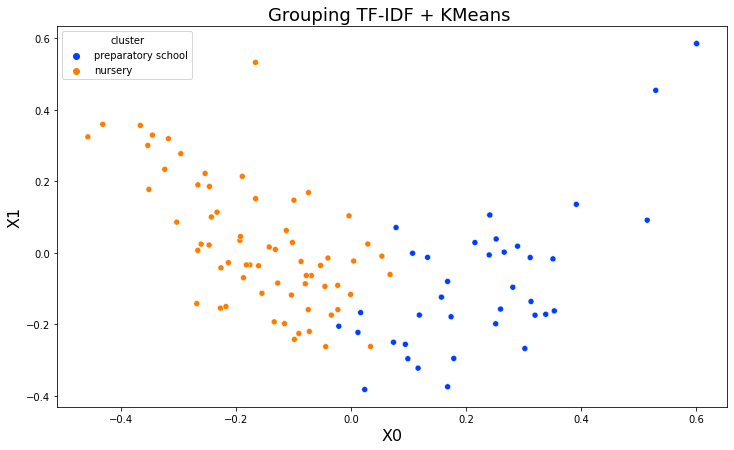

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 7))
plt.title("Grouping TF-IDF + KMeans ", fontdict={"fontsize": 18})
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
sns.scatterplot(data=df_childcare, x='x0', y='x1', hue='cluster', palette="bright")
plt.savefig('childcare_clustering.png')
plt.show()